In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL'] = "True"

In [4]:
!pip install --upgrade pip
!pip install scikit-learn
!pip install --upgrade bltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 53.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bltk: filename=bltk-1.2-py3-none-any.whl size=17432520 sha256=f6e3692c1d7093eed2a48d7b5244b86188943fe2b045544cfacb56c007b349b0
  Stored in directory: /root/.cache/pip/wheels/52/7d/57/4806e1ef5d1ad1491ce0ac43aaa0377293efbc9a81d5b7e6c8
  Created wheel for sklearn: filename=sklearn-0.0.post12-py3-none-any.whl size=2180 sha256=7974a23b46cad0f25f0005056fc36266f8b7a198057c1d962a2bf57255071fd9
  Stored in directory: /root/.cache/pip/wheels/74/ac/72/70628b34c069f92d5b3ec2d0934cb5d38d655f7a80cfee2917
Successfully built bltk sklearn


##**Importing Libraries**

In [5]:
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer # BLTK: The Bengali Natural Language Processing Toolkit
from bltk.langtools import remove_stopwords
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import collections
import nltk
import numpy as np
import codecs

In [6]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)



In [7]:
print(f'Vowels: {vowels}')
print(f'Vowel signs: {vowel_signs}')
print(f'Consonants: {consonants}')
print(f'Digits: {digits}')
print(f'Operators: {operators}')
print(f'Punctuation marks: {punctuations}')
print(f'Others: {others}')

Vowels: ['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'ঌ', 'এ', 'ঐ', 'ও', 'ঔ']
Vowel signs: ['া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ৄ', 'ে', 'ৈ', 'ো', 'ৌ']
Consonants: ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়', 'ৎ', 'ং', 'ঃ', 'ঁ']
Digits: ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']
Operators: ['=', '+', '-', '*', '/', '%', '<', '>', '×', '÷']
Punctuation marks: ['।', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']', '{', '}', '(', ')', '–', '—', '―', '~']
Others: ['৳', '৺', '্', 'ঀ', 'ঽ', '#', '$']


In [8]:
INPUT_FILE = "/content/drive/My Drive/SentimentalAnalysis/Dataset/ecommerce_dataset.txt"
stopwords_list ="/content/drive/My Drive/SentimentalAnalysis/Dataset/stopwords.txt"


##**Dataset Preparation and Cleaning**

In [9]:
counter = collections.Counter()
tokenizer = Tokenizer()
maxlen = 0
xs, ys = [], []
bangla_stopwords = codecs.open(stopwords_list,'r',encoding='utf-8').read().split()

fin = codecs.open(INPUT_FILE, "r", encoding='utf-16')
for line in fin:

    _, sent = line.strip().split("\t") #Stripping the dataset based on tab. That is stripping label from sentence
    print("Label: ", _)
    print("Sentence: ",sent)

    words = tokenizer.word_tokenizer(sent)
    print("Afert Tokenizing: ",words)

    wordsExcludingPunctuationMarks=[word for word in words if word not in punctuations]
    print("Truncating punctuation:", wordsExcludingPunctuationMarks)

    wordsExcludingStopWords = [word.strip() for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
    print("Truncating StopWords:", wordsExcludingStopWords)

    if len(wordsExcludingStopWords) > maxlen: #For calculating the maximum number of words in a sentence
        maxlen = len(wordsExcludingStopWords)
    for wordExcludingStopWords in wordsExcludingStopWords:
        counter[wordExcludingStopWords] += 1 #Putting the frequency of each  word in a dictionary
    print("***************************************************************************************")

    ys.append(int(_))
    xs.append(' '.join(wordsExcludingStopWords))


fin.close()



Streaming output truncated to the last 5000 lines.
Truncating StopWords: ['প্যাকেজিং', 'ভালো', 'প্রোডাক্ট', 'ভালো', 'ওয়াটার', 'প্রুফ', 'তাড়াতাড়িই', 'প্রোডাক্ট', 'হাতে', 'পেয়েছি', 'সবমিলিয়ে', 'সন্তোষজনক']
***************************************************************************************
Label:  1
Sentence:  প্রোডাক্ট টা খুবই ভালো প্যাকেটিং টা অনেক সুন্দর ছিল ঘড়িটা অনেক সুন্দর এক কথায় বলতে গেলে অসাধারণ
Afert Tokenizing:  ['প্রোডাক্ট', 'টা', 'খুবই', 'ভালো', 'প্যাকেটিং', 'টা', 'অনেক', 'সুন্দর', 'ছিল', 'ঘড়িটা', 'অনেক', 'সুন্দর', 'এক', 'কথায়', 'বলতে', 'গেলে', 'অসাধারণ']
Truncating punctuation: ['প্রোডাক্ট', 'টা', 'খুবই', 'ভালো', 'প্যাকেটিং', 'টা', 'অনেক', 'সুন্দর', 'ছিল', 'ঘড়িটা', 'অনেক', 'সুন্দর', 'এক', 'কথায়', 'বলতে', 'গেলে', 'অসাধারণ']
Truncating StopWords: ['প্রোডাক্ট', 'টা', 'খুবই', 'ভালো', 'প্যাকেটিং', 'টা', 'সুন্দর', 'ঘড়িটা', 'সুন্দর', 'এক', 'কথায়', 'অসাধারণ']
***************************************************************************************
Label:  1
Sentence:  খুবই

In [10]:
xs

['অনেকগুলা অরডার একটু দেখবেন',
 'ভালোবাসা রইল ইভ্যালির',
 'আগের প্রডাক্ট ক্লিয়ার তারাতাড়ি',
 'ভাল লাগতেছে না',
 'দয়া একটু ভাই পাবো',
 'সঠিক তারিখে দিতেন অভিযোগ দিত না',
 'কমার্সের নামে আপনারা মানুষের সাথে করতেছে একদিন হিসাব আপনাদের কড়ায় ঘন্ডায়',
 'ফাইজলামি!!',
 'দীর্ঘ হায়াত কামনা',
 'ভাই অডার মত টাকা নাই স্বপ্নের খুবই প্রয়োজনীয় বাইকটা পাব না',
 'ভাই সামান্য গ্রোসারি আইটেম পারলেন না ৩ মাসে',
 'যুবকের স্বপ্ন বেঁচে পুরণ',
 'কথা মিল রাখলে গ্রাহক বারবে না কমবে আশা দ্রুত সমাদান ধন্যবাদ',
 'ভাই পন্য গুলো পাবো,,,,,',
 'Daraz মাসেই না কিনেছি বড় ছোট অর্ডার',
 'প্রডাক্ট গুলো পাওয়ার সম্ভাবনা ভাই',
 'খবর বার্তা নাই তাড়াতাড়ি ডেলিভারি দেন..',
 'আপনারা কখনো মানুষের আস্থা অর্জন পারবেন না ১০০%!!',
 'কাষ্টমারের ভোগান্তি কমিয়ে কথা অনুযায়ী করারও পরামর্শ রইলো',
 'ওয়াদা দিবেন না যেটা রক্ষা পারবেন না ধন্যবাদ',
 'সততা ব্যবসা সফলতা আসবে ',
 'ভালো ভালো রাখবেন গ্রাহক দের',
 'বেস্ট অব লাক',
 'এগিয়ে যাক ইভেলি আগামীর পথে স্বপ্ন পূরনে',
 'বাকি অর্ডার গুলো দেরি একটু দেওয়ার অনুরোধ করতেছি',
 'অর্ডার আসতে পারছে না যথাস

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=0)
Xtrain

['খুবি বাজে কোয়ালিটি ভাই ডিজাইন ভালো লাগছিল কিনছিলাম দাম দিয়েও বাট পুরাই বাজে',
 '"আলহামদুলিল্লাহ যেটা ওর্ডার করছি পাইছি।অল্প দামে খুবই ভালো একটা প্রোডাক্ট',
 'মাসে ৫/৬ ডেলিভারি ম্যান আসতো প্রডাক্ট ডেলিভারি দিতে,,এখন এক এক বারও আসে না,,কারণ ডেলিভারি চার্জ বাড়ানোর অর্ডারই না',
 'ভালো লেগেছে',
 'এক আরেক ৷ চিটিং',
 'খারাপ অভিজ্ঞতা',
 'দুইটা নিয়েছি সুন্দর',
 'হাইলি রিকমেন্ডড',
 'রমজানের টি-শার্ট দাম ৪৯৫ টাকা ঈদের বেড়ে ৫৯৫ টাকা সবচেয়ে বড় কথা এক সপ্তার কালার',
 'ধন্যবাদ ভাল মানের কাপড়',
 'স্নোবল ফেয়ারি লাইটস টা সত্যিই অসম্ভব সুন্দর কোয়ালিটি ফুল প্রতিটি লাইট ঠিক',
 'শুধু ধোঁকা বাজি',
 'পণ্যের দাম বেশি দেখিয়ে তারপরে ডিসকাউন্ট দেয়া একটা শুভঙ্করের ফাঁকি',
 'বছর পাব না',
 'কোয়ালিটি এভারেজ সেলাইগুলো দুর্বল ব্যাগটা সুন্দর বাচ্চাদের সাথে মানানসই ভারী না বহন বুদ্ধিমানের',
 'ওয়েবসাইট বন্ধ',
 'জিনিস পাব',
 'খারাপ মানের খাবার',
 'জঘন্য বার্গার সত্যি টাকাই লস',
 'দোকানের পরিষেবা অত্যন্ত সন্তুষ্ট',
 'আলহামদুলিল্লাহ প্রোডাক্ট ভাল ছিলাম ঠিক তেমনই পেয়েছি',
 'হতাশ কেনার সীমা সীমাবদ্ধ অর্ডার পারছি না',


##**TF-IDF**

In [13]:
tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())
Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)


n_samples: 1223, n_features: 12988


In [14]:
#transforming test data into tf-idf matrix
Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)



n_samples: 408, n_features: 12988


##**Naive Bayes**

In [16]:
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)
#predicted y
y_pred = naive_bayes_classifier.predict(Xtest_tf)

[[167  37]
 [ 13 191]]
0.8774509803921569
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       204
           1       0.84      0.94      0.88       204

    accuracy                           0.88       408
   macro avg       0.88      0.88      0.88       408
weighted avg       0.88      0.88      0.88       408



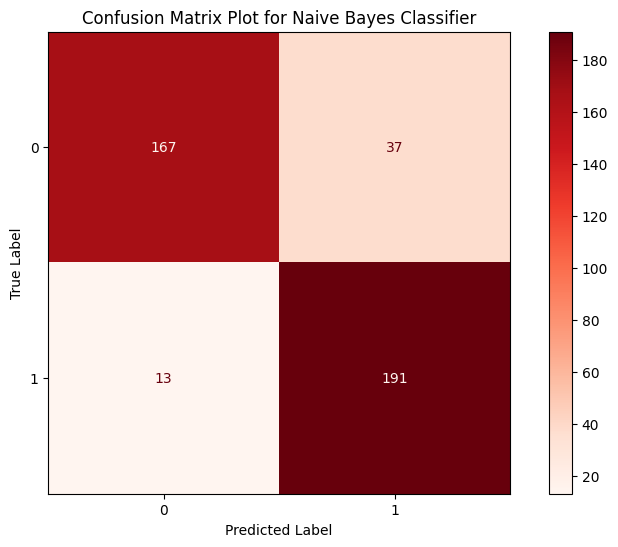

In [17]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = ConfusionMatrixDisplay.from_estimator(naive_bayes_classifier , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Naive Bayes Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [18]:
fprNB, tprNB, thresholdsNB = metrics.roc_curve(Ytest,y_pred)

##**Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
LRClassification=LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)
y_pred=LRClassification.predict(Xtest_tf)


[[165  39]
 [ 13 191]]
0.8725490196078431
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       204
           1       0.83      0.94      0.88       204

    accuracy                           0.87       408
   macro avg       0.88      0.87      0.87       408
weighted avg       0.88      0.87      0.87       408



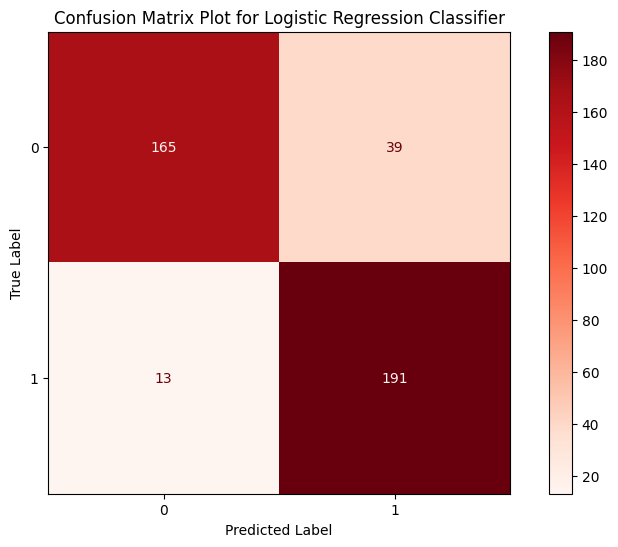

In [20]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))
matrix = ConfusionMatrixDisplay.from_estimator(LRClassification , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

##**Decision Tree**

In [21]:
fprLR, tprLR, thresholdsLR = metrics.roc_curve(Ytest,y_pred)

In [22]:
from sklearn.tree import DecisionTreeClassifier
DTClassification=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTClassification.fit(Xtrain_tf, Ytrain)
y_pred=DTClassification.predict(Xtest_tf)

[[187  17]
 [ 47 157]]
0.8431372549019608
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       204
           1       0.90      0.77      0.83       204

    accuracy                           0.84       408
   macro avg       0.85      0.84      0.84       408
weighted avg       0.85      0.84      0.84       408



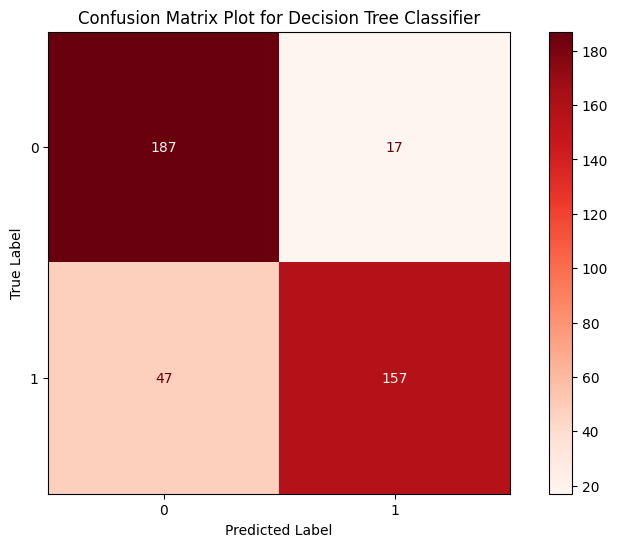

In [23]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = ConfusionMatrixDisplay.from_estimator(DTClassification , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Decision Tree Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [24]:
fprDT, tprDT, thresholdsDT = metrics.roc_curve(Ytest,y_pred)

##**SVM**

In [25]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(Xtrain_tf, Ytrain)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_tf)

[[179  25]
 [ 14 190]]
0.9044117647058824
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.88      0.93      0.91       204

    accuracy                           0.90       408
   macro avg       0.91      0.90      0.90       408
weighted avg       0.91      0.90      0.90       408



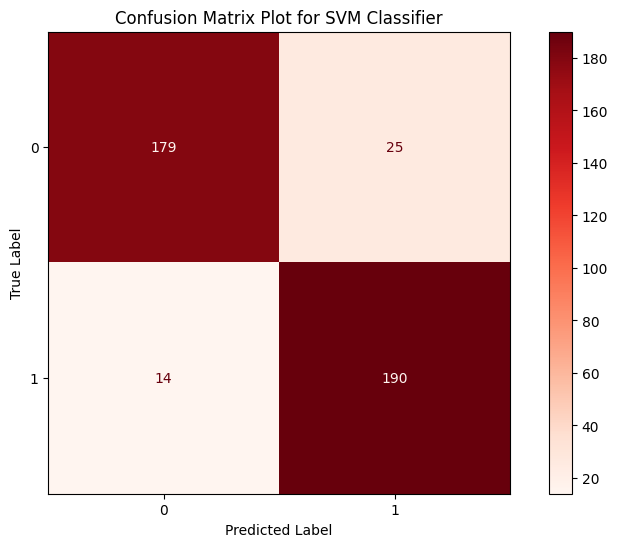

In [26]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = ConfusionMatrixDisplay.from_estimator(clf , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SVM Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [27]:
fprSVM, tprSVM, thresholdsSVM = metrics.roc_curve(Ytest,y_pred)

##**Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0).fit(Xtrain_tf, Ytrain)
y_pred=rf_classifier.predict(Xtest_tf)

[[149  55]
 [ 13 191]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       204
           1       0.78      0.94      0.85       204

    accuracy                           0.83       408
   macro avg       0.85      0.83      0.83       408
weighted avg       0.85      0.83      0.83       408



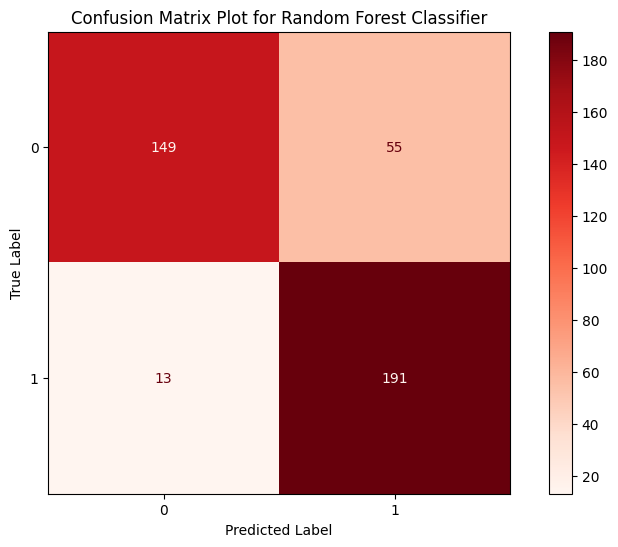

In [ ]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = ConfusionMatrixDisplay.from_estimator(rf_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [29]:
fprRF, tprRF, thresholdsRF = metrics.roc_curve(Ytest,y_pred)

##**SGD**

In [30]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss = 'log_loss',penalty='l2', max_iter=10).fit(Xtrain_tf, Ytrain)
y_pred=sgd_classifier.predict(Xtest_tf)

[[179  25]
 [ 16 188]]
0.8995098039215687
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       204
           1       0.88      0.92      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



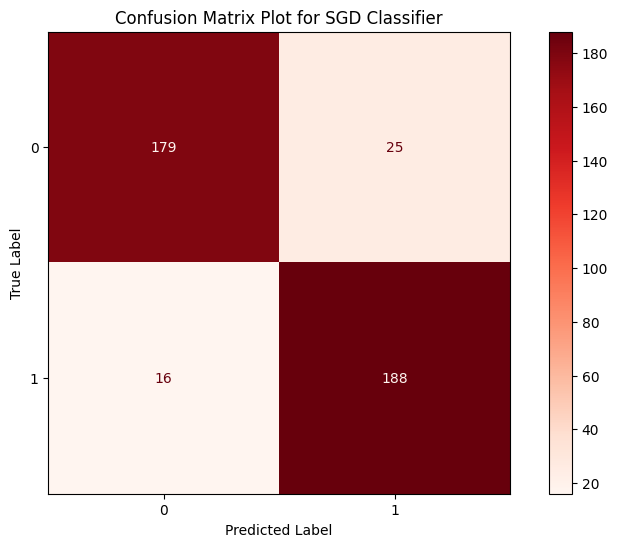

In [31]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = ConfusionMatrixDisplay.from_estimator(sgd_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [32]:
fprSGD, tprSGD, thresholdsSGD = metrics.roc_curve(Ytest,y_pred)

##**RandomizedSearchCV**

In [33]:
svm_clf = svm.SVC(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             'kernel': ['rbf']}

rand_search = RandomizedSearchCV(svm_clf , param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc)
rand_search.fit(Xtrain_tf, Ytrain)
rand_search.cv_results_
rand_predictions = rand_search.predict(Xtest_tf)


[[180  24]
 [ 14 190]]
0.9068627450980392
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.89      0.93      0.91       204

    accuracy                           0.91       408
   macro avg       0.91      0.91      0.91       408
weighted avg       0.91      0.91      0.91       408



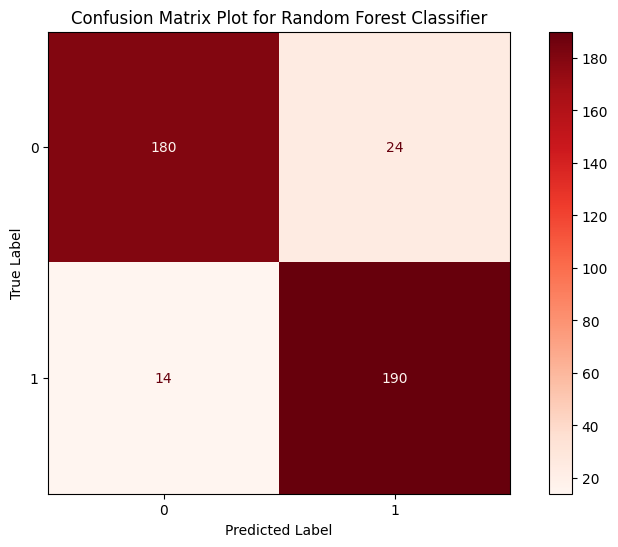

In [34]:
print(confusion_matrix(Ytest,rand_predictions))
print(accuracy_score(Ytest,rand_predictions))
print(classification_report(Ytest,rand_predictions))
matrix = ConfusionMatrixDisplay.from_estimator(rand_search, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [35]:
fprSVM_optimized, tprSVM_optimized, thresholds_optimized = metrics.roc_curve(Ytest,y_pred)

##**ROC**

<Figure size 640x480 with 0 Axes>

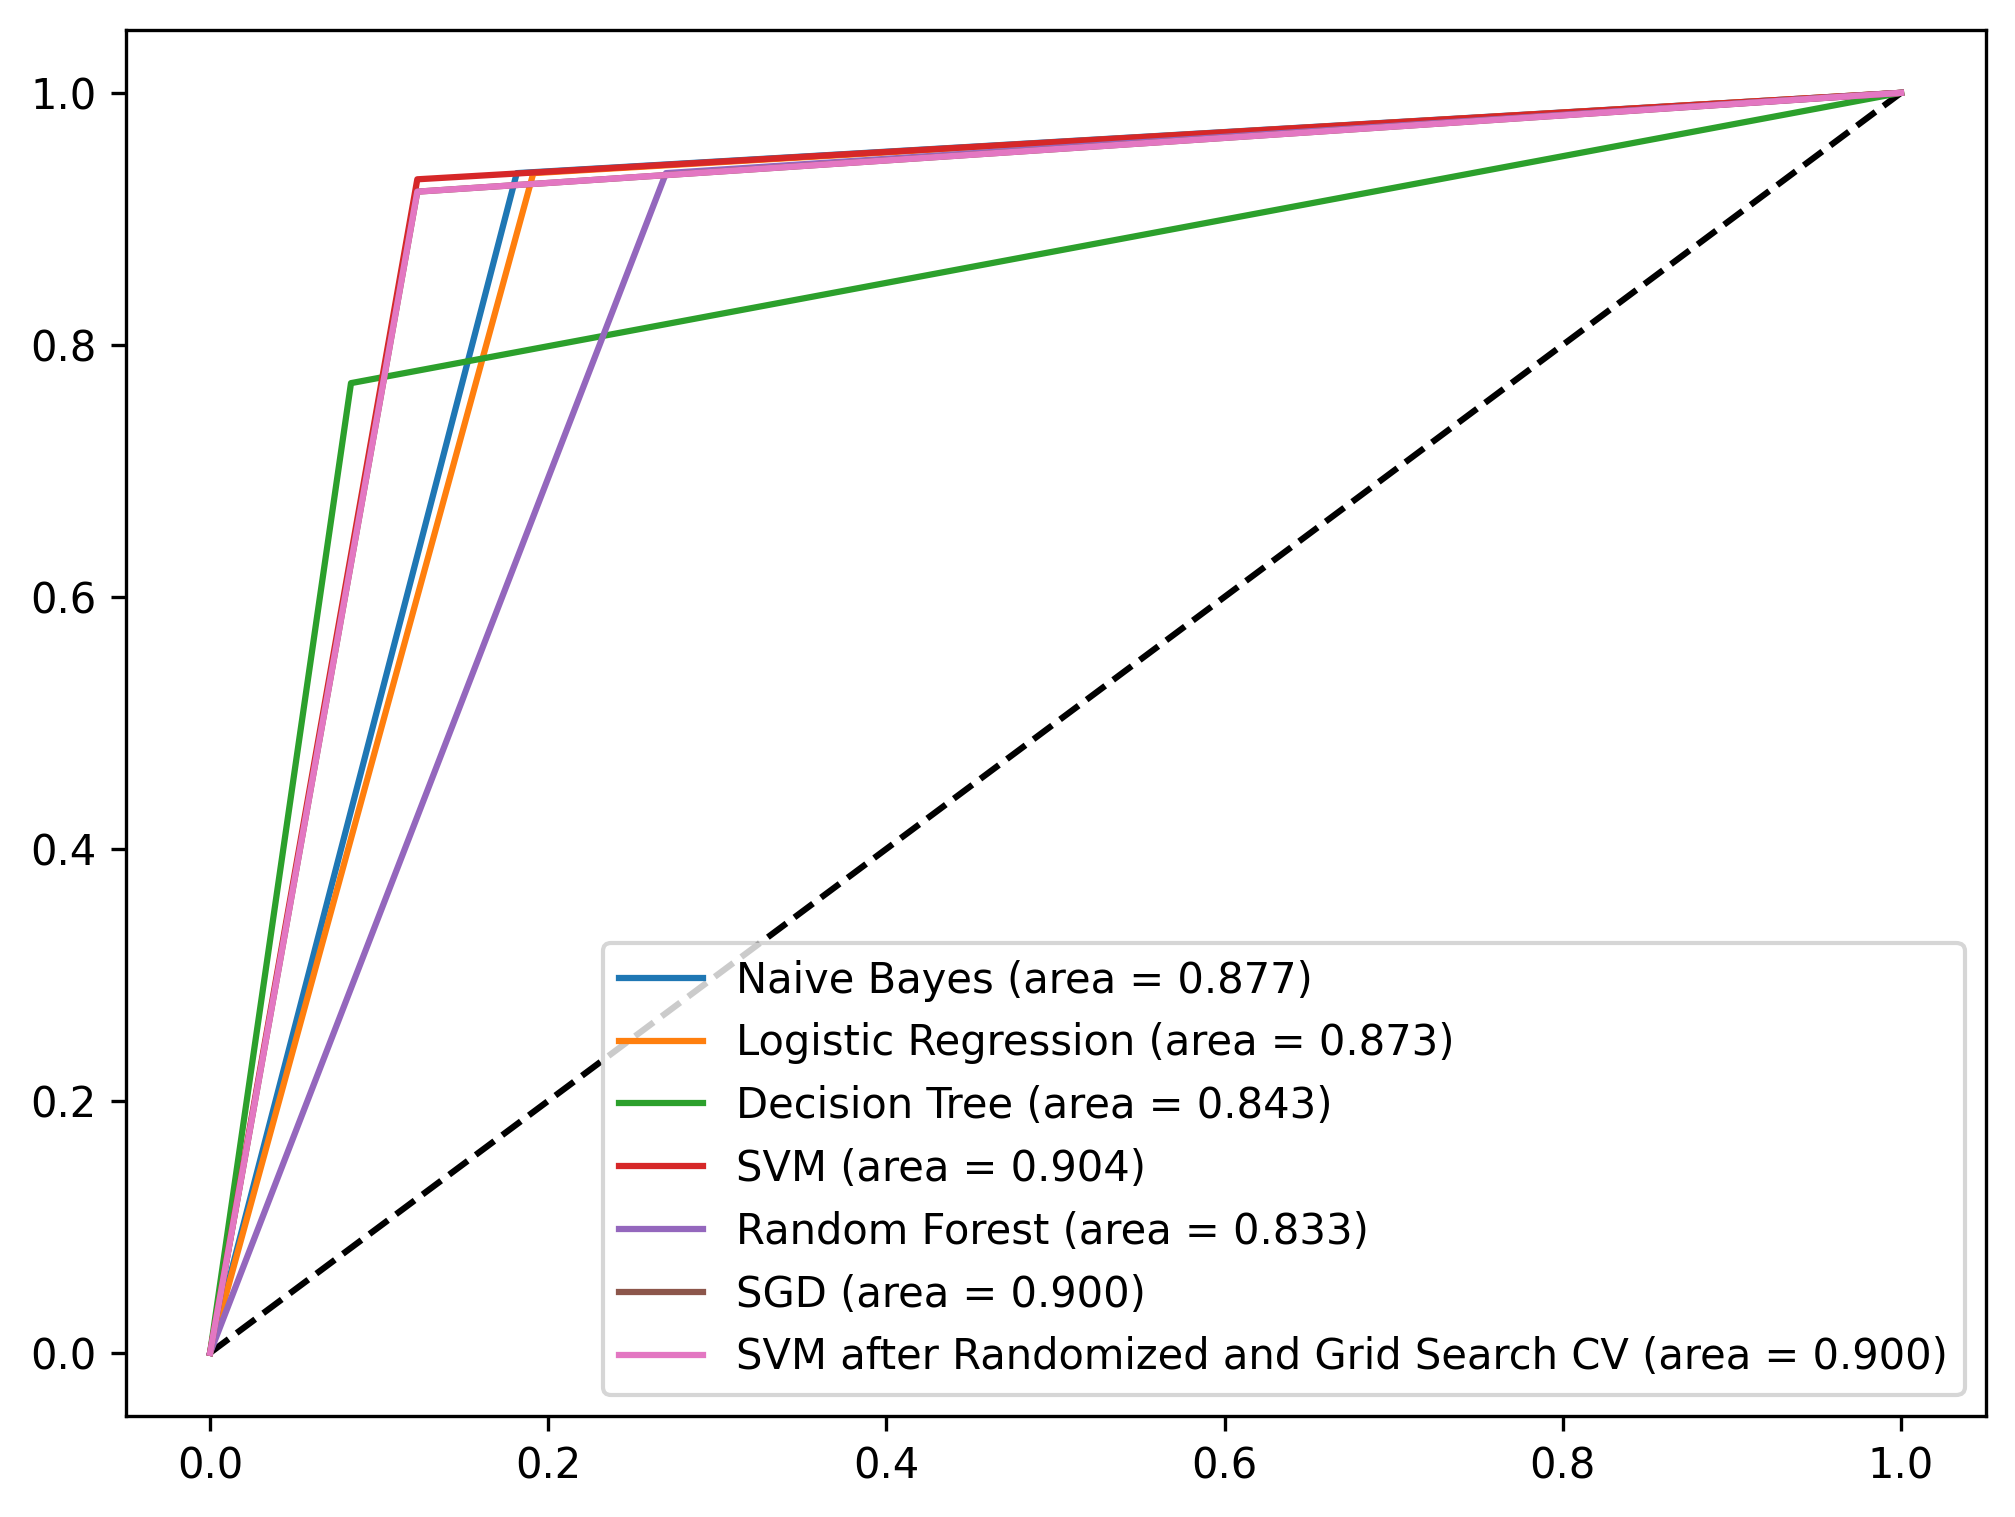

In [36]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

plt.figure(1)
plt.figure(figsize=(8, 6), dpi=300)
plt.plot([0, 1], [0, 1], 'k--')

auc_NB = auc(fprNB, tprNB)
auc_LR = auc(fprLR, tprLR)
auc_DT = auc(fprDT , tprDT)
auc_SVM = auc(fprSVM, tprSVM)
auc_RF = auc(fprRF, tprRF)
auc_SGD = auc(fprSGD, tprSGD)
auc_SVM_optimized = auc(fprSVM_optimized, tprSVM_optimized)

plt.plot(fprNB, tprNB, label='Naive Bayes (area = {:.3f})'.format(auc_NB))
plt.plot(fprLR, tprLR, label='Logistic Regression (area = {:.3f})'.format(auc_LR))
plt.plot(fprDT, tprDT, label='Decision Tree (area = {:.3f})'.format(auc_DT))
plt.plot(fprSVM, tprSVM, label='SVM (area = {:.3f})'.format(auc_SVM))
plt.plot(fprRF, tprRF, label='Random Forest (area = {:.3f})'.format(auc_RF))
plt.plot(fprSGD, tprSGD, label='SGD (area = {:.3f})'.format(auc_SGD))
plt.plot(fprSVM_optimized, tprSVM_optimized, label='SVM after Randomized and Grid Search CV (area = {:.3f})'.format(auc_SVM_optimized))


plt.legend(loc='lower right')
plt.show()